In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from qgis.core import *
from qgis.PyQt.QtGui import *
from qgis.PyQt.QtCore import *
from IPython.display import Image

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

#sns.set_context('talk')
plt.style.use('seaborn-whitegrid')

In [2]:
QgsApplication.setPrefixPath(r'C:\\OSGeo4W64\\apps\\qgis', True)
qgs = QgsApplication([], True)
qgs.initQgis()
sys.path.append(r'C:\OSGeo4W64\apps\qgis\python\plugins')
project = QgsProject.instance()

Casos por região

In [3]:
xls = pd.ExcelFile('https://www.arcgis.com/sharing/rest/content/items/b5e7488e117749c19881cce45db13f7e/data')
data = pd.read_excel(xls, 'Antal per dag region')
data2 = pd.read_excel(xls, 'Antal avlidna per dag')
data3 = pd.read_excel(xls, 'Totalt antal per åldersgrupp')

In [4]:
# For the next step we create a subset with only regions as columns. We call it "region"
region = data.iloc[:, 2:]
region

,Blekinge,Dalarna,Gotland,Gävleborg,Halland,Jämtland_Härjedalen,Jönköping,Kalmar,Kronoberg,Norrbotten,...,Stockholm,Sörmland,Uppsala,Värmland,Västerbotten,Västernorrland,Västmanland,Västra_Götaland,Örebro,Östergötland
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,3,3,0,18,8,2,24,16,8,9,...,130,14,30,2,0,3,28,107,11,9
112,12,18,0,22,21,15,35,17,12,7,...,146,12,48,23,2,41,36,119,28,25
113,19,16,0,30,34,18,45,14,32,10,...,152,20,35,27,14,33,40,106,31,30
114,11,16,2,27,27,17,38,18,19,6,...,183,12,39,26,3,22,22,96,31,0


In [5]:
# Columns in the dataset "region"
region.columns.tolist()

['Blekinge',
 'Dalarna',
 'Gotland',
 'Gävleborg',
 'Halland',
 'Jämtland_Härjedalen',
 'Jönköping',
 'Kalmar',
 'Kronoberg',
 'Norrbotten',
 'Skåne',
 'Stockholm',
 'Sörmland',
 'Uppsala',
 'Värmland',
 'Västerbotten',
 'Västernorrland',
 'Västmanland',
 'Västra_Götaland',
 'Örebro',
 'Östergötland']

In [6]:
region = region.sum(axis = 0, skipna = True) 
region = pd.DataFrame(region)
region.reset_index(level=0, inplace=True)
region.columns = ['region', 'cases']
region = region.sort_values(by='cases', ascending=False)
region

,region,cases
11,Stockholm,11911
18,Västra_Götaland,5574
20,Östergötland,1974
13,Uppsala,1843
19,Örebro,1777
10,Skåne,1664
12,Sörmland,1620
6,Jönköping,1486
17,Västmanland,1255
3,Gävleborg,1233


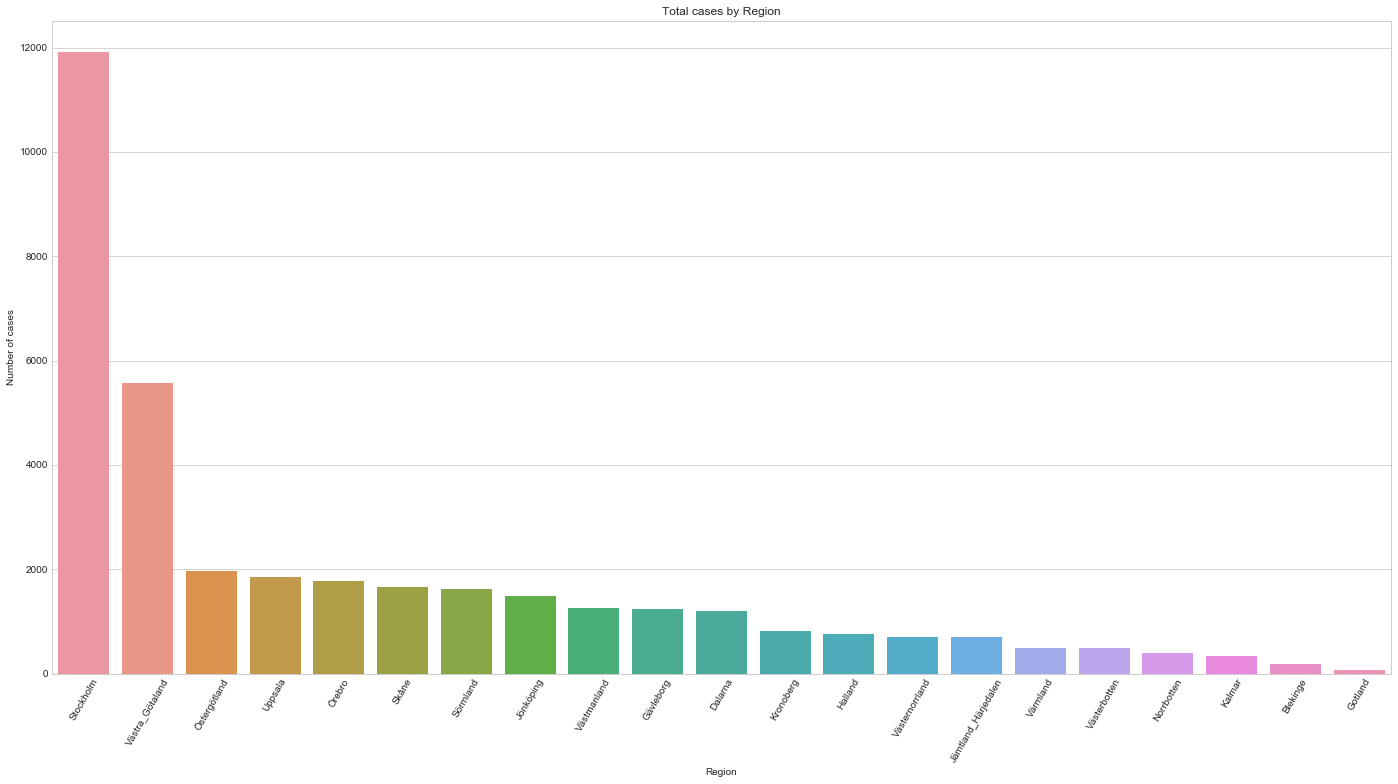

In [7]:
fig, ax = plt.subplots(figsize=(24, 12))
ax = sns.barplot(x="region", y="cases", data=region)
ax.set(xlabel="Region",
       ylabel="Number of cases",
       title="Total cases by Region")
plt.xticks(rotation=60);
plt.savefig('Images/grafico_barras_regiao.jpg', bbox_inches='tight')

In [8]:
vectorLyr=QgsVectorLayer("C:\\OSGeo4W64\\bin\\Epidemiologia1\\Sweden\\mapa\\SWE_adm1.shp","Sweden","ogr")
vectorLyr.isValid()

uri='file:///C:/OSGeo4W64/bin/Epidemiologia1/Sweden/dados/time_series_confimed-confirmed.csv?delimiter=,'
infoLyr=QgsVectorLayer(uri,'','delimitedtext')
infoLyr.isValid()


QgsProject.instance().addMapLayer(vectorLyr)
QgsProject.instance().addMapLayer(infoLyr)
csvField='Display_Name'
shpField='NAME_1'

joinObject=QgsVectorLayerJoinInfo()
joinObject.setJoinFieldName(csvField)
joinObject.setTargetFieldName(shpField)
joinObject.setJoinLayerId(infoLyr.id())
joinObject.setUsingMemoryCache(False)
joinObject.setJoinLayer(infoLyr)
vectorLyr.addJoin(joinObject)

vlayer = QgsProject.instance().mapLayersByName('Sweden')[0]

for field in vlayer.fields():
    print("Column "+field.name()+" Load")

Column ID_0 Load
Column ISO Load
Column NAME_0 Load
Column ID_1 Load
Column NAME_1 Load
Column TYPE_1 Load
Column ENGTYPE_1 Load
Column NL_NAME_1 Load
Column VARNAME_1 Load
Column _Region Load
Column _Population Load
Column _Lat Load
Column _Long Load
Column _25/02/2020 Load
Column _26/02/2020 Load
Column _27/02/2020 Load
Column _28/02/2020 Load
Column _29/02/2020 Load
Column _01/03/2020 Load
Column _02/03/2020 Load
Column _03/03/2020 Load
Column _04/03/2020 Load
Column _05/03/2020 Load
Column _06/03/2020 Load
Column _07/03/2020 Load
Column _08/03/2020 Load
Column _09/03/2020 Load
Column _10/03/2020 Load
Column _11/03/2020 Load
Column _12/03/2020 Load
Column _13/03/2020 Load
Column _14/03/2020 Load
Column _15/03/2020 Load
Column _16/03/2020 Load
Column _17/03/2020 Load
Column _18/03/2020 Load
Column _19/03/2020 Load
Column _20/03/2020 Load
Column _21/03/2020 Load
Column _22/03/2020 Load
Column _23/03/2020 Load
Column _24/03/2020 Load
Column _25/03/2020 Load
Column _26/03/2020 Load
Colu

In [9]:
dict = []

for feature in vlayer.getFeatures():
    if feature['NAME_1']:
        Display_Name = feature['NAME_1']
        if feature['_Region_Total']:
            confirmed = feature['_Region_Total']
        else:
            confirmed = 0
        if feature['_Region_Deaths']:
            deaths = feature['_Region_Deaths']
        else:
            deaths = 0
        if feature['_Hospital_Total']:
            hospital = feature['_Hospital_Total']
        else:
            hospital = 0
        if feature['_At_ICU']:
            icu = feature['_At_ICU']
        else:
            icu = 0
       
    e = {'Name': Display_Name, 'Confirmed': confirmed, 'Death': deaths, 'Hospital_Total': hospital, 'At_ICU': icu}
    dict.append(e)

In [10]:
size = len(dict)-7

c = sorted(dict, key = lambda i: i['Confirmed'],reverse=True)
d = sorted(dict, key = lambda i: i['Death'],reverse=True)
r = sorted(dict, key = lambda i: i['Hospital_Total'],reverse=True)
a = sorted(dict, key = lambda i: i['At_ICU'],reverse=True)


top5confirmed = c[0:7]
top5death = d[0:7]
top5hospital = r[0:7]
top5icu = a[0:7]


Gráfico circular com a percentagem de casos de cada região

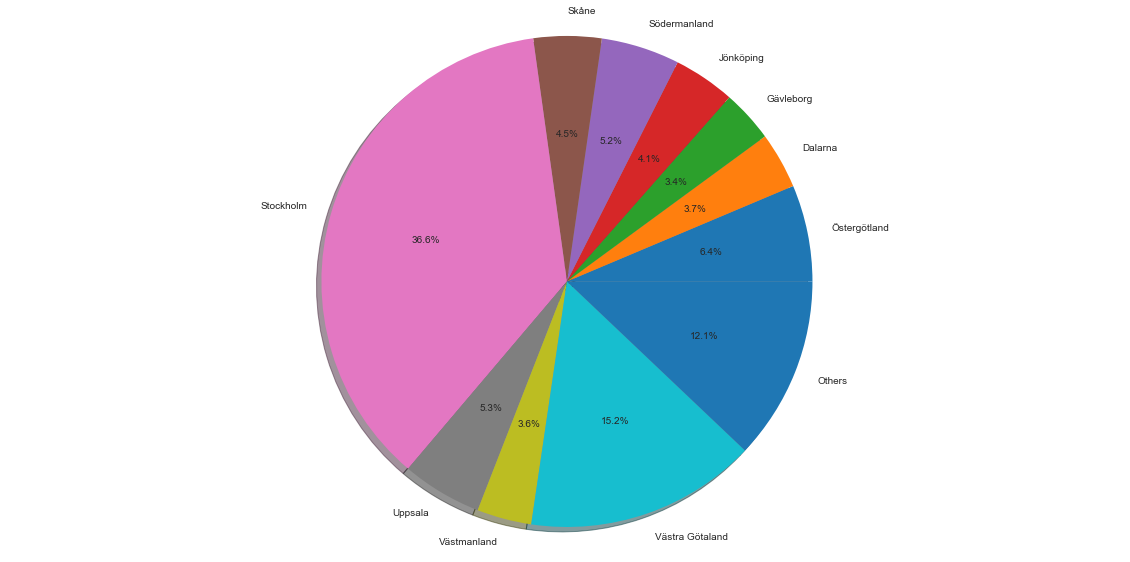

In [11]:
values = []
labels = []
total = 0
lowerTotal = 0
i = 0

for feature in vlayer.getFeatures():
    if feature['_Region_Total']:
        total += feature['_Region_Total']

for feature in vlayer.getFeatures():
    if feature['_Region_Total']:
        if (feature['_Region_Total']/total) > 0.025:
            values.append(feature['_Region_Total'])
            labels.append(feature['NAME_1'])
        else:
            lowerTotal += feature['_Region_Total']
            
fig = plt.figure(figsize=[20,10]);
            
values.append(lowerTotal)
labels.append("Others")

plt.pie(values, labels=labels, shadow=True, autopct='%1.1f%%')
plt.axis('equal')
plt.savefig('Images/grafico_circular.jpg', bbox_inches='tight')
plt.show()

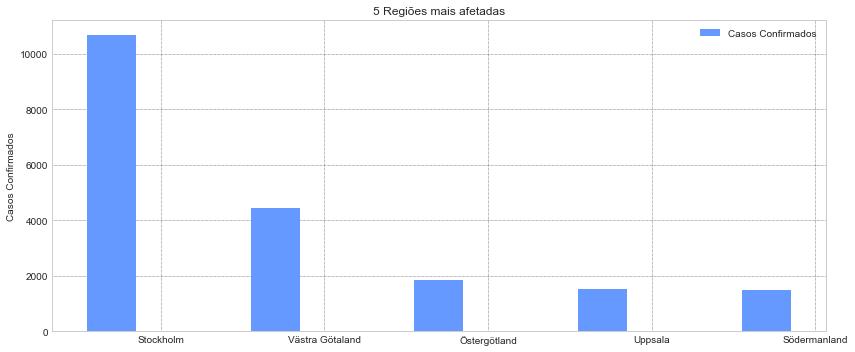

In [12]:
meta = [top5confirmed[0]['Confirmed'],top5confirmed[1]['Confirmed'],top5confirmed[2]['Confirmed'],top5confirmed[3]['Confirmed'],top5confirmed[4]['Confirmed']]
Display_Name = [top5confirmed[0]['Name'],top5confirmed[1]['Name'],top5confirmed[2]['Name'],top5confirmed[3]['Name'],top5confirmed[4]['Name']]

fig = plt.figure(figsize=[12,5]);
index = np.arange(5)
bar_width = 0.3


rects1 = plt.bar(index, meta, bar_width, label='Casos Confirmados', color='#6699ff')
plt.grid(b=True, color='k', linestyle=':', lw=.5, zorder=1)

plt.ylabel('Casos Confirmados')
plt.title('5 Regiões mais afetadas')
plt.xticks(index + bar_width,Display_Name,)
plt.legend()

plt.tight_layout()
plt.savefig('Images/top5casos.jpg', bbox_inches='tight')
plt.show()

Grafico Mortes

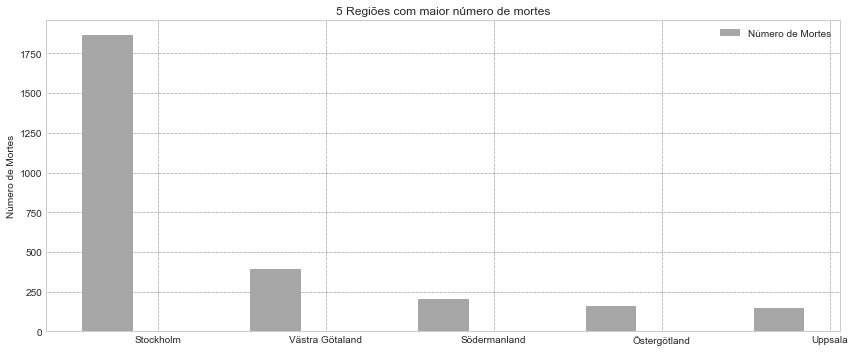

In [13]:
meta = [top5death[0]['Death'],top5death[1]['Death'],top5death[2]['Death'],top5death[3]['Death'],top5death[4]['Death']]
Display_Name = [top5death[0]['Name'],top5death[1]['Name'],top5death[2]['Name'],top5death[3]['Name'],top5death[4]['Name']]


fig = plt.figure(figsize=[12,5]);
index = np.arange(5)
bar_width = 0.3


rects1 = plt.bar(index, meta, bar_width, label='Número de Mortes', color='#a6a6a6')
plt.grid(b=True, color='k', linestyle=':', lw=.5, zorder=1)

plt.ylabel('Número de Mortes')
plt.title('5 Regiões com maior número de mortes')
plt.xticks(index + bar_width,Display_Name,)
plt.legend()

plt.tight_layout()
plt.savefig('Images/top5mortes.jpg', bbox_inches='tight')
plt.show()

Gráfico do total de doentes que já estiveram hospitalizados

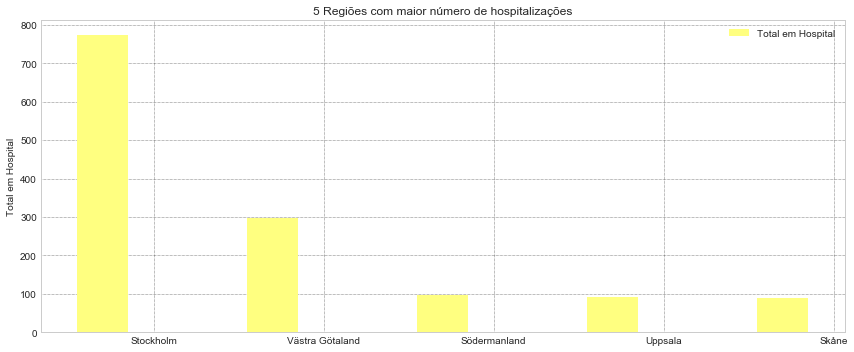

In [14]:
meta = [top5hospital [0]['Hospital_Total'],top5hospital [1]['Hospital_Total'],top5hospital [2]['Hospital_Total'],top5hospital [3]['Hospital_Total'],top5hospital [4]['Hospital_Total']]
Display_Name = [top5hospital [0]['Name'],top5hospital [1]['Name'],top5hospital [2]['Name'],top5hospital [3]['Name'],top5hospital [4]['Name']]


fig = plt.figure(figsize=[12,5]);
index = np.arange(5)
bar_width = 0.3


rects1 = plt.bar(index, meta, bar_width, label='Total em Hospital', color='#ffff80')
plt.grid(b=True, color='k', linestyle=':', lw=.5, zorder=1)

plt.ylabel('Total em Hospital')
plt.title('5 Regiões com maior número de hospitalizações')
plt.xticks(index + bar_width,Display_Name,)
plt.legend()

plt.tight_layout()
plt.savefig('Images/top5hospitalizacoes.jpg', bbox_inches='tight')
plt.show()

Gráfico de doentes em Unidades de Cuidados Intensivos

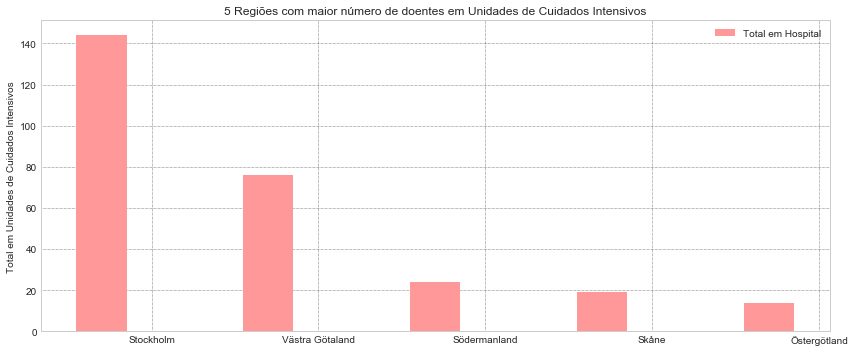

In [15]:
meta = [top5icu [0]['At_ICU'],top5icu [1]['At_ICU'],top5icu [2]['At_ICU'],top5icu [3]['At_ICU'],top5icu [4]['At_ICU']]
Display_Name = [top5icu [0]['Name'],top5icu [1]['Name'],top5icu [2]['Name'],top5icu [3]['Name'],top5icu [4]['Name']]


fig = plt.figure(figsize=[12,5]);
index = np.arange(5)
bar_width = 0.3


rects1 = plt.bar(index, meta, bar_width, label='Total em Hospital', color='#ff9999')
plt.grid(b=True, color='k', linestyle=':', lw=.5, zorder=1)

plt.ylabel('Total em Unidades de Cuidados Intensivos')
plt.title('5 Regiões com maior número de doentes em Unidades de Cuidados Intensivos')
plt.xticks(index + bar_width,Display_Name,)
plt.legend()

plt.tight_layout()
plt.savefig('Images/top5atICU.jpg', bbox_inches='tight')
plt.show()

In [16]:
uri='file:///C:/OSGeo4W64/bin/Epidemiologia1/Sweden/dados/owid-covid-data.csv?delimiter=,'
infoLyr=QgsVectorLayer(uri,'','delimitedtext')
infoLyr.isValid()


True

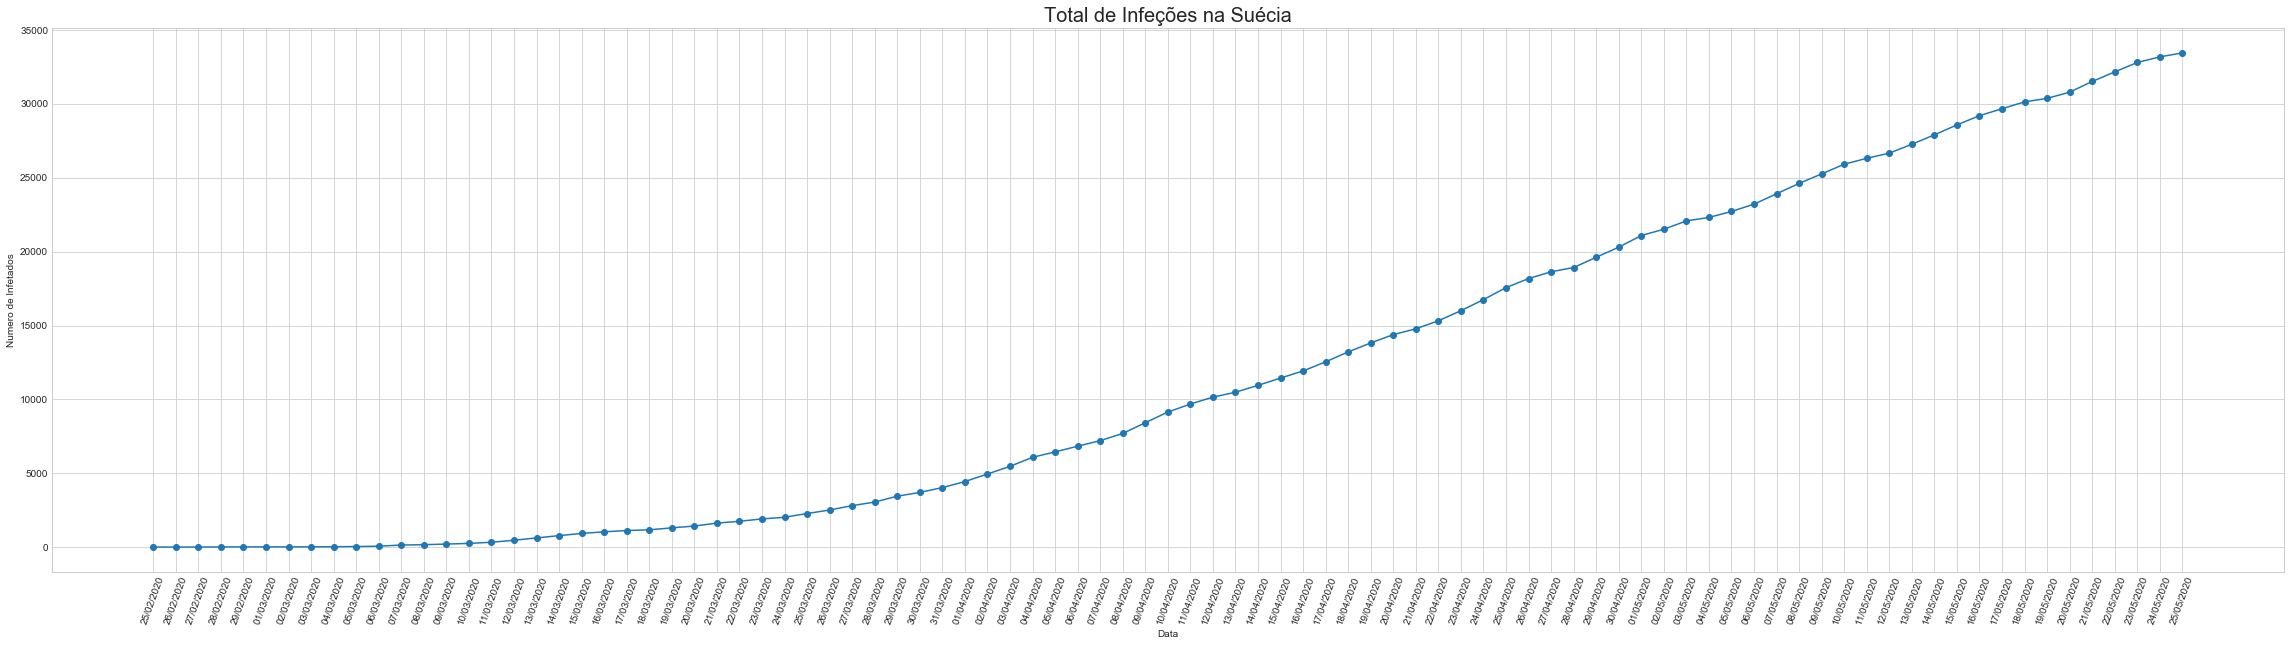

In [17]:
values = []
labels = []


lowerTotal = 0
i = 0


for feature in infoLyr.getFeatures():
    if feature['location']=="Sweden":
        if feature['total_cases']>0:
            values.append(feature['total_cases'])
            labels.append(feature['date'])
            
            

fig = plt.figure(figsize=[40,10]);


cov_date = pd.Series(values, index=labels)
plt.xlabel('Data')
plt.tick_params(axis='x', rotation=70)
plt.ylabel('Numero de Infetados')
plt.title('Total de Infeções na Suécia', fontsize=20)
plt.plot(cov_date, 'o-')
plt.savefig('Images/crescimento_infecoes.jpg', bbox_inches='tight')

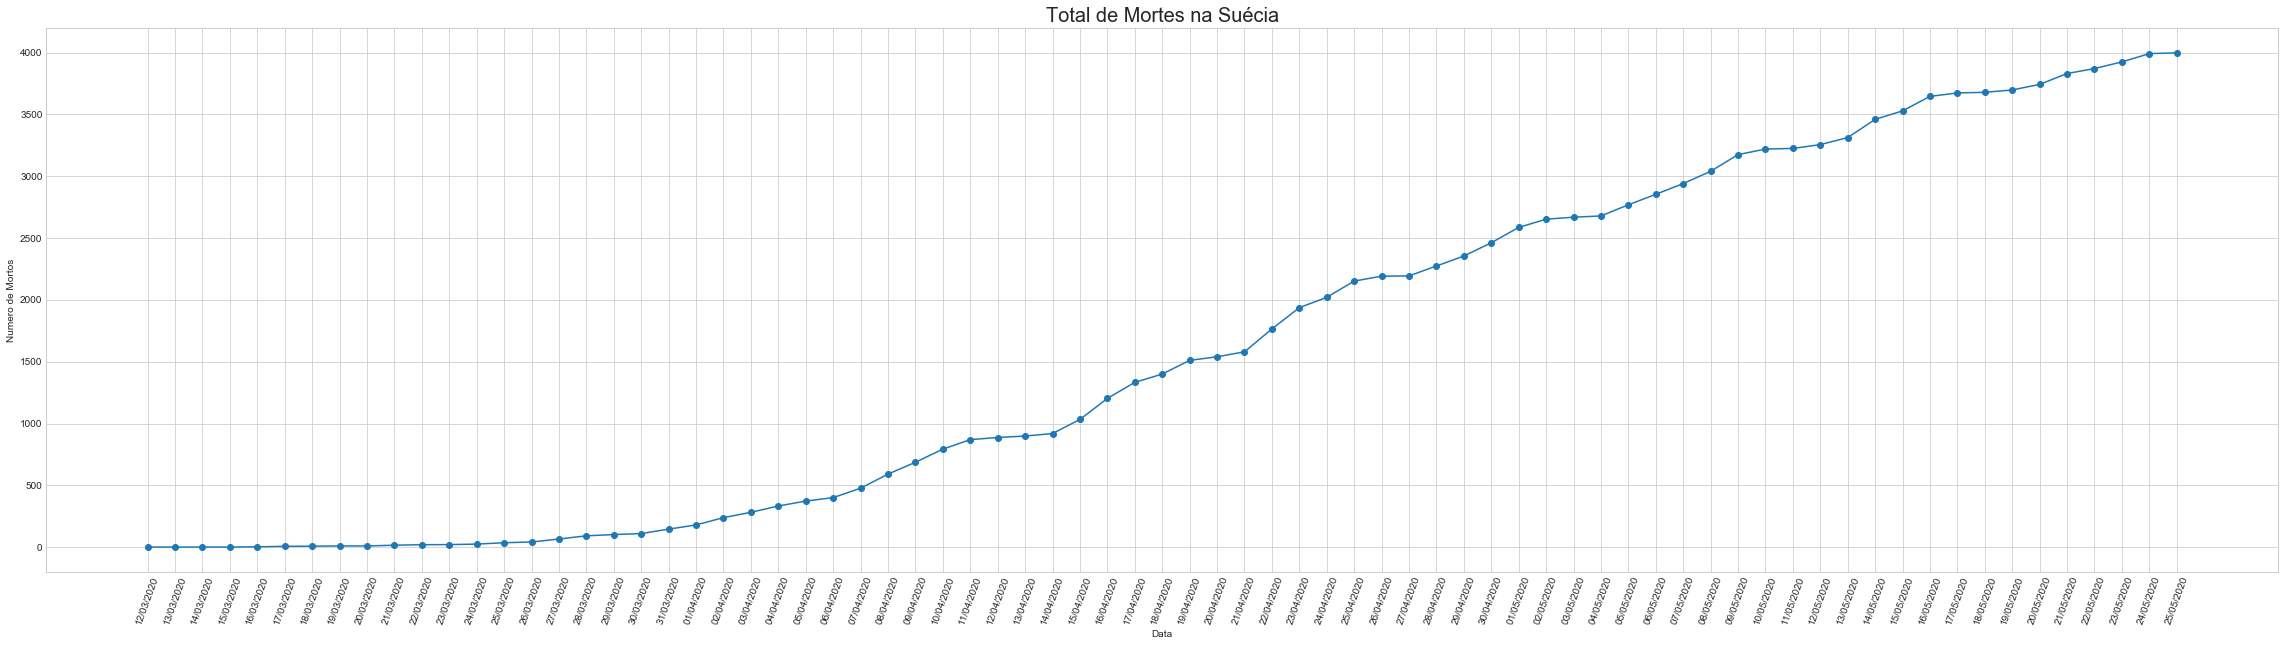

In [18]:
values1 = []
labels = []


lowerTotal = 0
i = 0


for feature in infoLyr.getFeatures():
    if feature['location']=="Sweden":
        if feature['total_deaths']>0:           
            labels.append(feature['date'])
            values1.append(feature['total_deaths'])
            

fig = plt.figure(figsize=[40,10]);


cov_date = pd.Series(values1, index=labels)
plt.xlabel('Data')
plt.tick_params(axis='x', rotation=70)
plt.ylabel('Numero de Mortos')
plt.title('Total de Mortes na Suécia', fontsize=20)
plt.plot(cov_date, 'o-')
plt.savefig('Images/crescimento_mortes.jpg', bbox_inches='tight')

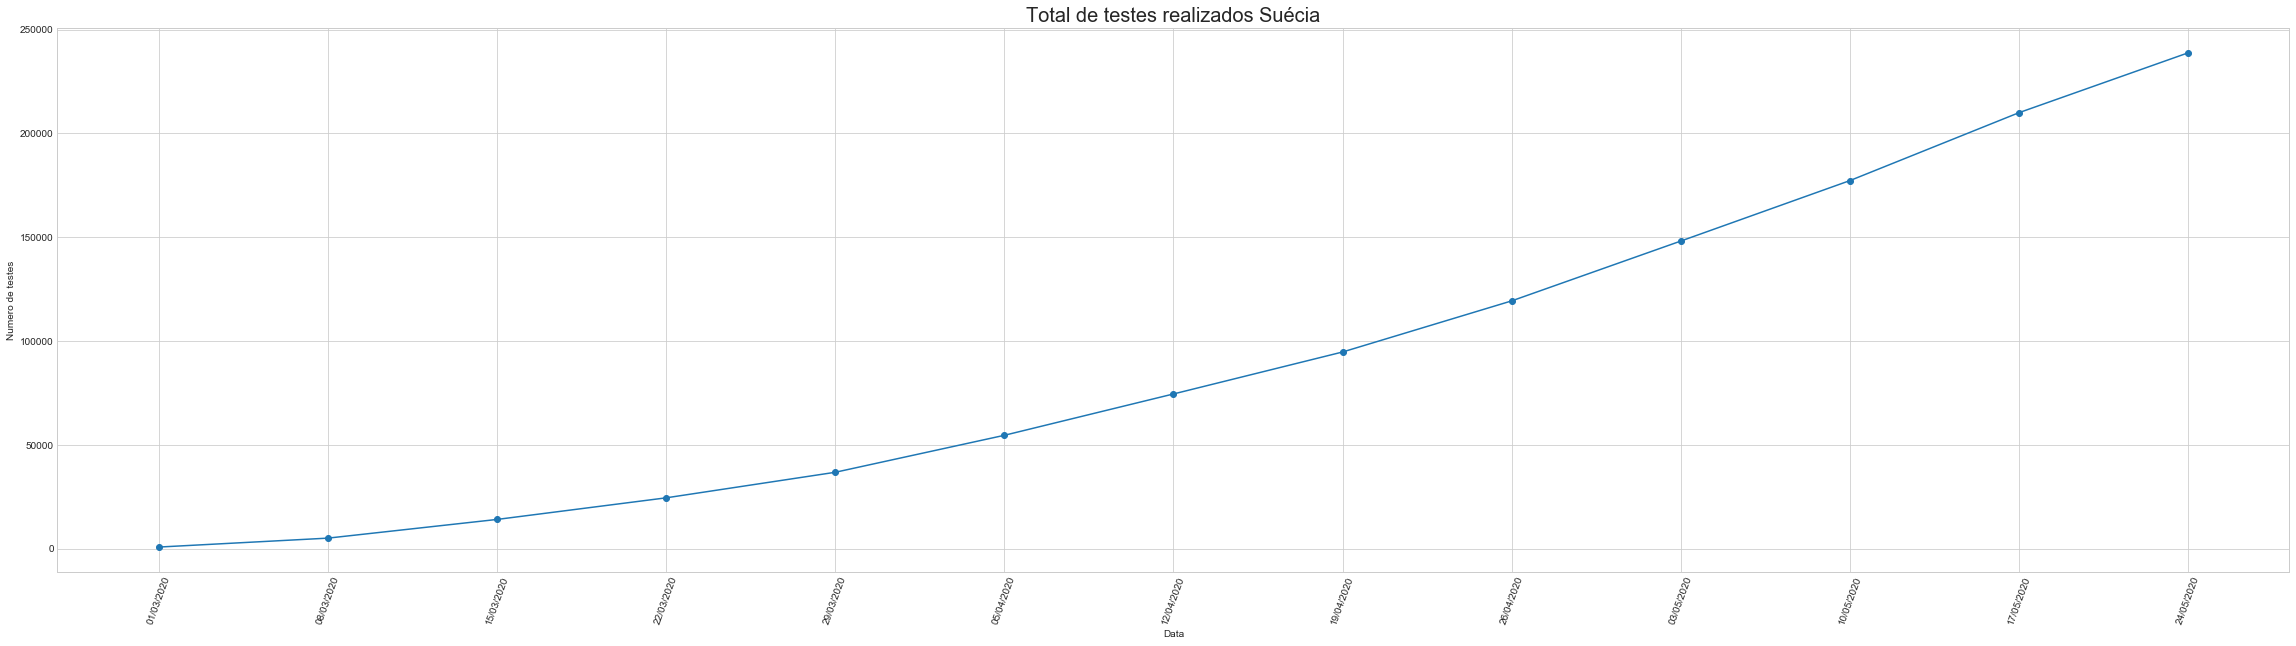

In [19]:
values2 = []
labels = []
datas = []

lowerTotal = 0
i = 0


for feature in infoLyr.getFeatures():
    if feature['location']=="Sweden":
        if feature['total_tests']>0:           
            labels.append(feature['date'])
            values2.append(feature['total_tests'])
            

fig = plt.figure(figsize=[40,10]);


cov_date = pd.Series(values2, index=labels)
plt.xlabel('Data')
plt.tick_params(axis='x', rotation=70)
plt.ylabel('Numero de testes')
plt.title('Total de testes realizados Suécia', fontsize=20)
plt.plot(cov_date, 'o-')
plt.savefig('Images/crescimento_tests.jpg', bbox_inches='tight')